In [2]:
import pandas as pd
import numpy  as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.DataFrame(np.random.randint(100,20000,size=(1000,9)),columns=['A','B','C','D','E','F','G','K','L'])
df.head()

,A,B,C,D,E,F,G,K,L
0,3786,17088,6910,17257,2420,5488,15170,6107,9255
1,9822,3225,3692,5920,17095,6091,12559,9502,6606
2,11075,1515,5678,2481,17297,14025,5329,9903,1045
3,6446,6806,14400,10179,2583,11373,5635,10239,10871
4,8311,14732,17135,3446,7749,18525,6259,12054,5103


In [94]:
# Create Y label
def Y(x):
    y = []
    for i in range(df.shape[0]):
        A = x['A'][i]
        B = x['B'][i]
        C = x['C'][i]
        D = x['D'][i]
        E = x['E'][i]
        F = x['F'][i]
        G = x['G'][i]
        SUM = A + B + C + D + E + F + G
        
        if SUM <= 69000:
            y.append(1)
        else :y.append(0)
    return y
    


x = df[['A','B','C','D','E','F','G']]

df['Y'] = Y(x)

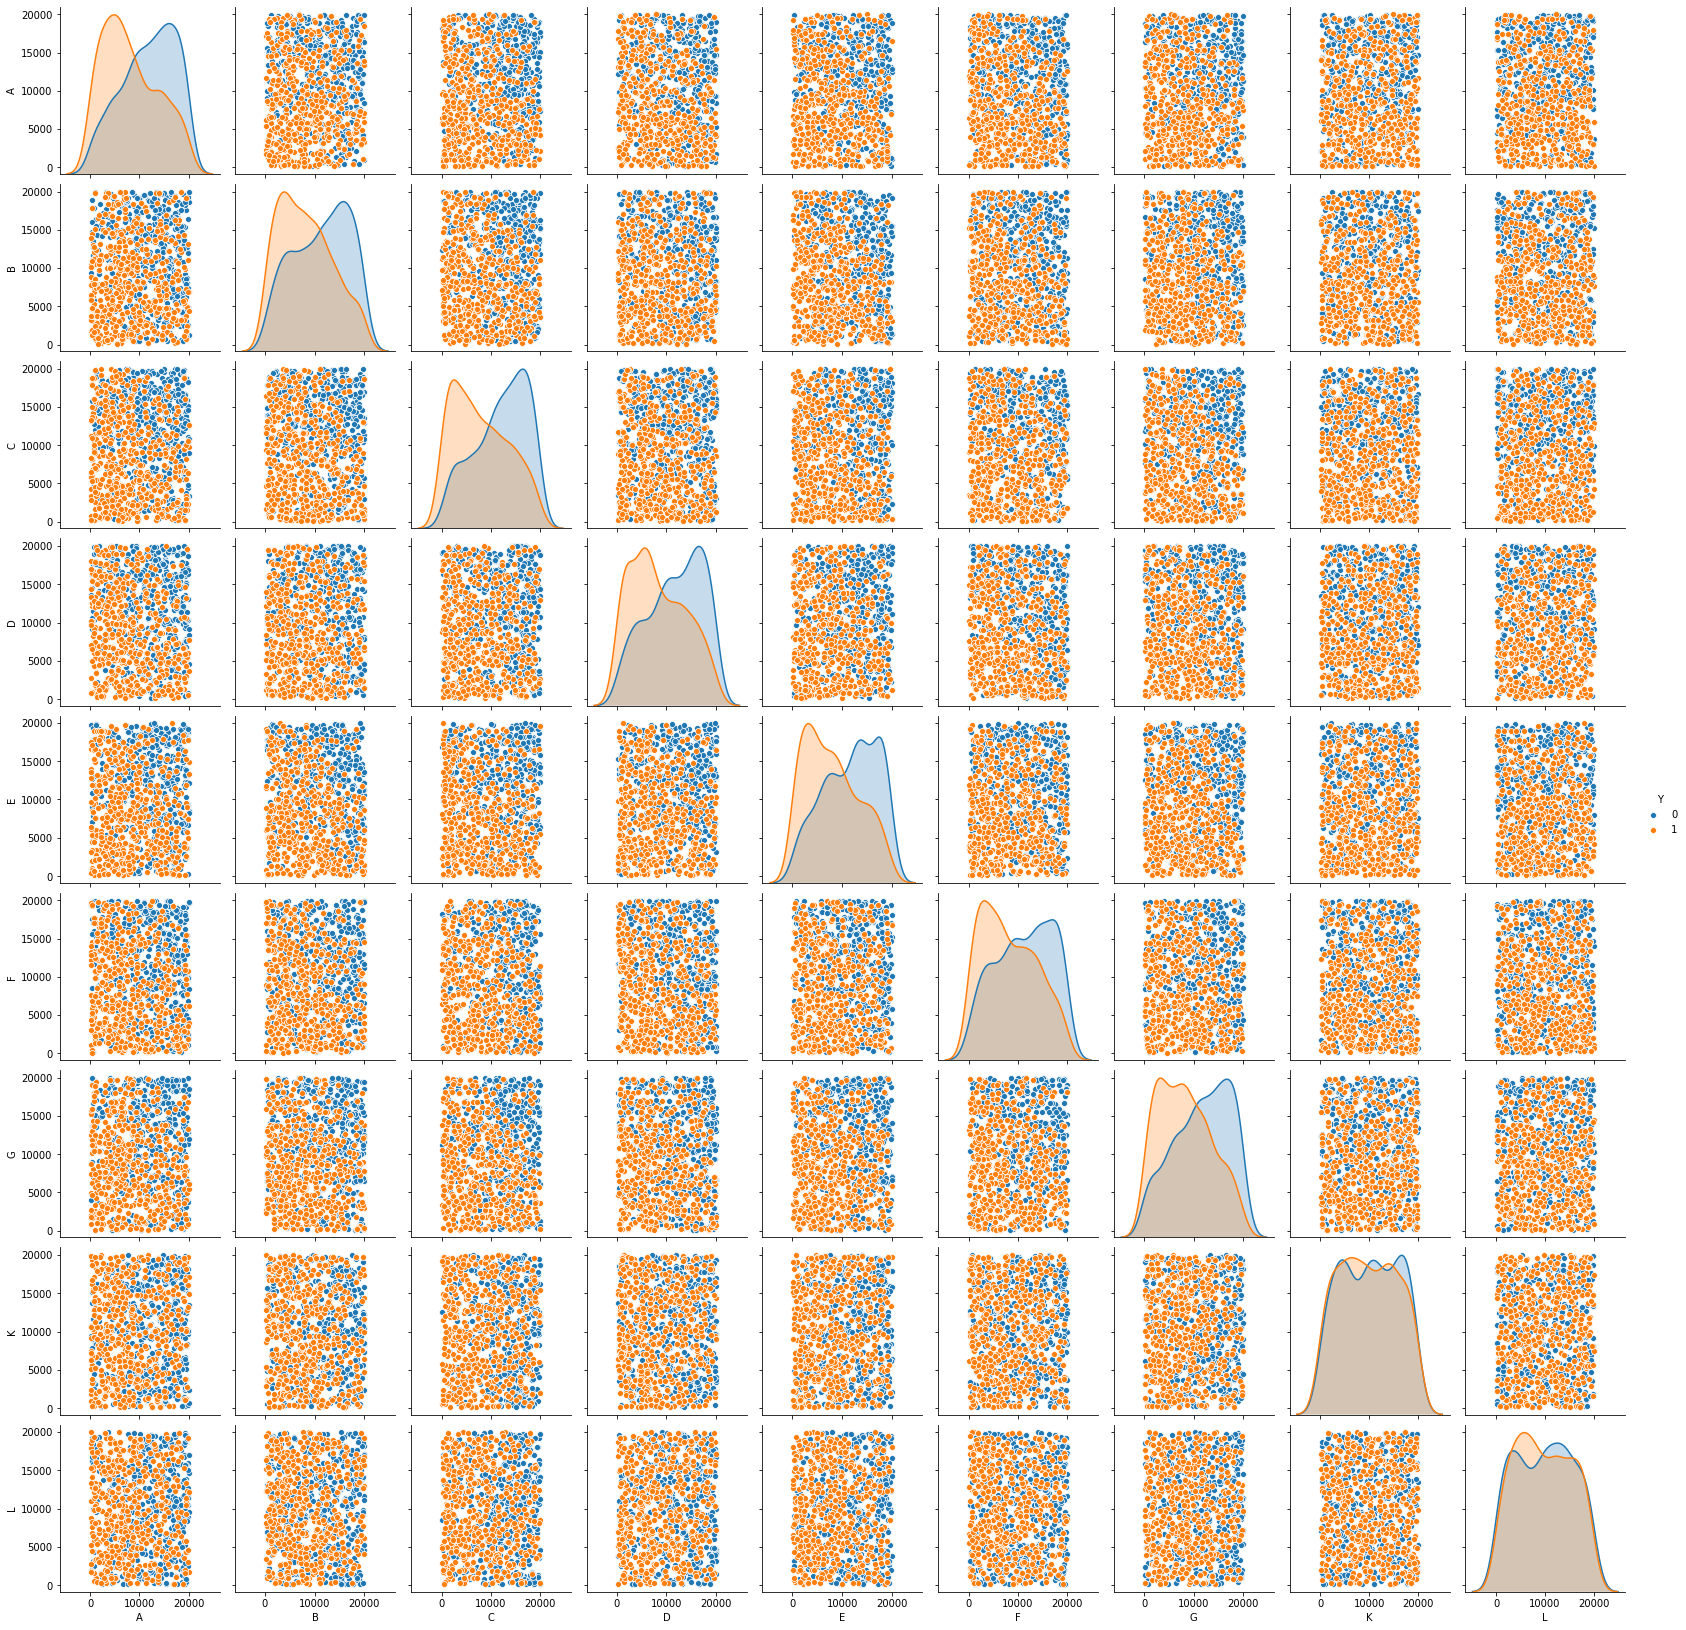

In [97]:
sns.pairplot(df ,hue='Y')

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
Scaler = StandardScaler()

In [108]:
Scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [110]:
scaled_features = Scaler.transform(df.drop('Y',axis=1))

In [111]:
df_feet = pd.DataFrame(scaled_features ,columns=df.columns[:-1])
df_feet.head()

,A,B,C,D,E,F,G,K,L
0,-1.089811,1.288717,-0.541962,1.241922,-1.302833,-0.741936,0.906856,-0.679009,-0.100064
1,-0.040262,-1.163662,-1.094214,-0.721785,1.279500,-0.637943,0.448139,-0.092962,-0.564594
2,0.177611,-1.466163,-0.753390,-1.317462,1.315045,0.730348,-0.822076,-0.023742,-1.539772
3,-0.627286,-0.530180,0.743425,0.015926,-1.274150,0.272986,-0.768316,0.034259,0.183318
4,-0.302997,0.871938,1.212788,-1.150312,-0.365099,1.506413,-0.658687,0.347565,-0.828160


In [113]:
from sklearn.model_selection import train_test_split

In [116]:
X = df_feet
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier(n_neighbors=1)

In [119]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [120]:
pred = knn.predict(X_test)

In [121]:
from sklearn.metrics import classification_report ,confusion_matrix

In [122]:
print(confusion_matrix(y_test,pred))

[[124  32]
 [ 33 111]]


In [123]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       156
           1       0.78      0.77      0.77       144

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [142]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i !=y_test))
    

Text(0, 0.5, 'Error Rate')

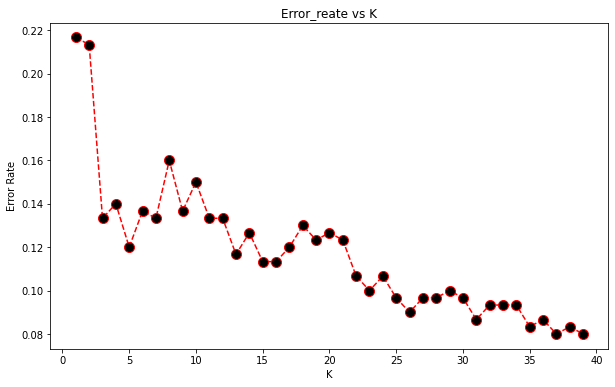

In [143]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40) ,error_rate ,color='red',linestyle='--',marker='o' ,
         markerfacecolor='black' ,markersize=10)
plt.title('Error_reate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [144]:
knn = KNeighborsClassifier(n_neighbors=35)
    
knn.fit(X_train,y_train)
    
pred_n = knn.predict(X_test)
    

print(confusion_matrix(y_test,pred))
print('---------------------------------------------------')
print(classification_report(y_test,pred))

[[124  32]
 [ 33 111]]
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       156
           1       0.78      0.77      0.77       144

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

